In [1]:
import scripts.init_gpu as init_gpu
import scripts.init_dataset as init_dataset
from scripts.triplet_functions import n_neurons
import pandas as pd


init_gpu.initialize_gpus()

locations = ['LOC1', 'LOC2']

print("Loading Dataset...")
# load the dataset
df = pd.read_csv(
    f"../dataset/processed/{locations[0]}-{locations[1]}-scaled-balanced.csv")

length = len(df.columns) - 2  # subtract the two label columns

# limit the length
# length = 20
# start_idx, end_idx = 20, 40
# df = df.loc[:, ['Location', 'Website', *
#                     [str(i) for i in range(start_idx, end_idx)]]]
# get train-test set
train_df, test_df, train_web_samples, test_web_samples = init_dataset.get_sample(
    df, locations, range(1500), 1200)

train_df.head()

2024-11-07 12:41:50.697894: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-07 12:41:50.704768: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1730943710.713060 2558572 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1730943710.715548 2558572 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-07 12:41:50.724124: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

Num GPUs Available:  2
Loading Dataset...
Training Websites: [1309, 228, 51, 563, 501, 457, 285, 209, 1385, 1116, 178, 1209, 864, 65, 61, 191, 447, 476, 1034, 1232, 54, 1149, 407, 1466, 1330, 1436, 1490, 859, 451, 919, 1206, 569, 13, 326, 1429, 865, 696, 1468, 318, 440, 689, 1492, 189, 778, 198, 735, 704, 1236, 541, 88, 940, 1098, 255, 775, 161, 1130, 600, 1287, 1266, 740, 1182, 393, 142, 93, 1354, 466, 592, 163, 1482, 206, 1456, 1462, 928, 1301, 747, 333, 758, 727, 429, 1372, 546, 1399, 1327, 146, 1247, 1300, 350, 1093, 1495, 334, 946, 777, 552, 1310, 1140, 449, 1402, 664, 114, 469, 1486, 646, 821, 548, 135, 432, 1161, 644, 435, 1342, 1022, 810, 1316, 939, 292, 542, 1493, 505, 1478, 1103, 538, 1197, 877, 1195, 817, 741, 1404, 283, 1043, 1010, 186, 96, 224, 313, 1285, 327, 1487, 1221, 130, 788, 781, 1220, 958, 1083, 514, 1133, 23, 234, 1099, 1419, 1312, 1463, 1498, 601, 890, 323, 929, 6, 539, 1025, 365, 1039, 217, 1280, 611, 1308, 1338, 1415, 1477, 1366, 765, 330, 1104, 1086, 1, 1226, 

/home/asil0892/doh_traffic_analysis/code/scripts/init_dataset.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.sort_values(by=["Location"], inplace=True)


,Location,Website,0,1,2,3,4,5,6,7,...,116,117,118,119,120,121,122,123,124,125
0,LOC1,0,-1.086861,0.690199,0.647933,0.201517,0.207139,-0.031855,-0.316768,0.824649,...,0.055571,0.160203,0.121677,0.093533,0.09274,0.057062,0.155991,0.109839,0.086282,0.08604
1,LOC1,1005,1.095547,-1.585943,0.647933,0.343653,0.207139,-0.031855,-0.316768,0.824649,...,0.055571,0.160203,0.121677,0.093533,0.09274,0.057062,0.155991,0.109839,0.086282,0.08604
2,LOC1,1005,1.095547,0.780047,-1.972790,0.343653,0.207139,-0.031855,-0.316768,0.824649,...,0.055571,0.160203,0.121677,0.093533,0.09274,0.057062,0.155991,0.109839,0.086282,0.08604
3,LOC1,1005,-1.086861,0.690199,0.647933,0.343653,0.207139,-0.031855,-0.316768,0.824649,...,0.055571,0.160203,0.121677,0.093533,0.09274,0.057062,0.155991,0.109839,0.086282,0.08604
4,LOC1,1005,1.095547,0.780047,0.183501,-0.828965,-2.083179,-0.031855,-0.316768,0.824649,...,0.055571,0.160203,0.121677,0.093533,0.09274,0.057062,0.155991,0.109839,0.086282,0.08604


# Load Web Model

In [2]:
import tensorflow as tf
web_model = tf.keras.models.load_model(f"../models/website/{locations[0]}-{locations[1]}-baseGRU-epochs200-train_samples1200-triplet_samples5.keras")

I0000 00:00:1730943716.567966 2558572 gpu_process_state.cc:201] Using CUDA malloc Async allocator for GPU: 0
I0000 00:00:1730943716.568068 2558572 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 16586 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4090, pci bus id: 0000:01:00.0, compute capability: 8.9
I0000 00:00:1730943716.568199 2558572 gpu_process_state.cc:201] Using CUDA malloc Async allocator for GPU: 1
I0000 00:00:1730943716.568256 2558572 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 21127 MB memory:  -> device: 1, name: NVIDIA GeForce RTX 4090, pci bus id: 0000:71:00.0, compute capability: 8.9


# Preparing the data

In [3]:
def location_to_onehot(select_location, locations):
    if select_location not in locations:
        raise ValueError(f"'{select_location}' is not in the list of locations")
    
    return [1 if location == select_location else 0 for location in locations]
location_to_onehot_dict = {location: location_to_onehot(location, locations) for location in locations}
location_to_onehot_dict

{'LOC1': [1, 0], 'LOC2': [0, 1]}

In [4]:
def filter_and_sort_data(df, location_label):
    """
    Filter the dataframe by location label, sort by Website label, and drop specified columns.
    """
    return (df[df['Location'] == location_label]
            .sort_values(by=['Website'])
            .iloc[:, 2:]
            .reset_index(drop=True))

In [5]:
# # Reduce training samples, too big to handle
# reduced_df = df.groupby(['Location', 'Website']).apply(lambda x: x.sample(n=20, random_state=init_dataset.random_seed)).reset_index(drop=True)



In [6]:
import numpy as np



def get_web_embeddings(df, location, web_model):
    embeddings = []
    chunk_size = 10000
    for i in range(0, 240000, chunk_size):
        chunk = filter_and_sort_data(df[i:i+chunk_size], location)
        
        # Pad the chunk if it's smaller than chunk_size
        if len(chunk) < chunk_size:
            chunk = chunk.reindex(range(chunk_size), fill_value=0)
        
        transformed_chunk = web_model(chunk)
        embeddings.append(transformed_chunk)
    
    return np.vstack(embeddings)
    

def get_data_for_decoder_preserver_locality(df, locations):
    input_data_list = [] # 240,000 * 2 * 2
    output_data_list = []
    
    for location in locations:
        web_embeddings = get_web_embeddings(df, location, web_model)

            
        # Preprocess input data
        location_labels = np.tile(location_to_onehot_dict[location], (web_embeddings.shape[0], 1))
        input_embedding_with_condition = np.hstack((web_embeddings, location_labels))
        
        # Preprocess output data
        output_traces = filter_and_sort_data(df, location).to_numpy()
        
        # Append both input and output to dataset lists
        input_data_list.append(input_embedding_with_condition)
        output_data_list.append(output_traces)
   
    # Concatenate all data
    input_data = np.vstack(input_data_list)
    output_data = np.vstack(output_data_list)
    
    return input_data, output_data 

def get_data_for_decoder(df, locations):
    input_data_list = [] # 240,000 * 2 * 2
    output_data_list = []
    
    for input_location in locations:
        # Get web embedding from the input location
        web_embeddings = get_web_embeddings(df, input_location, web_model)

        
        
        for output_location in locations:
            # Preprocess input data
            location_labels = np.tile(location_to_onehot_dict[output_location], (web_embeddings.shape[0], 1))
            input_embedding_with_condition = np.hstack((web_embeddings, location_labels))
            
            # Preprocess output data
            output_traces = filter_and_sort_data(df, output_location).to_numpy()
            
            # Append both input and output to dataset lists
            input_data_list.append(input_embedding_with_condition)
            output_data_list.append(output_traces)
    
    # Concatenate all data
    input_data = np.vstack(input_data_list)
    output_data = np.vstack(output_data_list)
    
    return input_data, output_data


input_train_data, output_train_data = get_data_for_decoder_preserver_locality(train_df, locations)

I0000 00:00:1730884300.149666 2406638 cuda_dnn.cc:529] Loaded cuDNN version 90300


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, LSTM, Reshape, GRU
from tensorflow.keras.optimizers import Adam

latent_length = n_neurons + len(locations)


# Define the model
# inputted = Input(shape=(latent_length,))
# x = Reshape((1, latent_length))(inputted)  # Add time dimension
# x = GRU(n_neurons, return_sequences=True, recurrent_dropout=0.2)(x)
# x = GRU(n_neurons, return_sequences=False, recurrent_dropout=0.1)(x)
# x =  Dense(n_neurons, activation='relu')(x)
# x = Dropout(0.1)(x)
# x =  Dense(n_neurons, activation='relu')(x)
# x = Dropout(0.1)(x)
# x =  Dense(n_neurons * 2, activation='relu')(x)
# x = Dropout(0.1)(x)
# x =  Dense(n_neurons * 2, activation='relu')(x)
# x = Dropout(0.1)(x)
# x =  Dense(length, activation='relu')(x)
# x = Dropout(0.1)(x)
# x =  Dense(length, activation='relu')(x)
# x = Dense(length)(x)

decoder = tf.keras.Sequential([
            tf.keras.layers.InputLayer(
                input_shape=(latent_length, )),
            tf.keras.layers.Dense(64, activation="tanh"),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(64, activation='tanh'),
            tf.keras.layers.Dropout(0.2),
 
            tf.keras.layers.RepeatVector(1),  # Prepare for GRU layers
            tf.keras.layers.GRU(
                length, return_sequences=False, activation="tanh"),
            # tf.keras.layers.GRU(
            #     length, return_sequences=False, activation="tanh"),
            tf.keras.layers.Dense(
                length, activation='linear')  # Output layer
        ])
decoder.compile(optimizer=Adam(), loss='mse', )

# Fit the model
decoder.fit(input_train_data, output_train_data, epochs=1000, batch_size=32, shuffle=True)
decoder.save(f'../models/decoder/LOC1-LOC2-Conditional-Decoder-e1000-locality-preserved.keras')

Epoch 1/1000


/home/asil0892/doh_traffic_analysis/.venv/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 8, but received input with shape (32, 34)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32, 34), dtype=float32)
  • training=True
  • mask=None

In [ ]:
# decoder.save(f'../models/decoder/LOC1-LOC2-Conditional-Decoder-e1000.keras')

NameError: name 'decoder' is not defined

In [5]:
import tensorflow as tf
decoder = tf.keras.models.load_model(f'../models/decoder/LOC1-LOC2-Conditional-Decoder-e1000-locality-preserved.keras')

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from fastdtw import fastdtw

import numpy as np
def get_euclidean_distance(a, b):
    return np.sqrt(np.sum(np.square(a - b)))


def evaluate_decoder(sampling_location, target_location):
    decoded_data = synthesize_traffic(sampling_location, target_location)
    target_traces = filter_and_sort_data(test_df, target_location).to_numpy()


    # eucld_dists = []
    for i in range(0, 200 * 20, 200):
        plt.figure()
        # real mean

        # real_mean = np.mean(target_traces[i:i+200], axis=0)
        # real_std = np.std(target_traces[i:i+200])
        
        plt.subplot(2, 1, 1)
        for j in range(200):
            # print(i+j)
            plt.plot(target_traces[i + j], alpha = 0.2, c='b')
        plt.ylim((-8, 5))
        # plt.fill_between(range(length),real_mean + real_std, real_mean - real_std, label='real std', alpha = 0.2)
        
        # synth mean
        synthetic_mean = np.mean(decoded_data[i:i+200], axis=0)
        synthetic_std = np.std(decoded_data[i:i+200])
        
        # dtw_distance, path = fastdtw(real_mean, synthetic_mean, dist=get_euclidean_distance)
        # euclidean_distance = get_euclidean_distance(real_mean, synthetic_mean)

        plt.subplot(2, 1, 2)

        for j in range(0, 200):
            plt.plot(decoded_data[i + j], alpha=0.2, c='k')
 
        plt.ylim((-8, 5))
        plt.plot(synthetic_mean, label='synthetic mean')
        # plt.fill_between(range(length), synthetic_mean + synthetic_std, synthetic_mean - synthetic_std, label='synth. std', alpha = 0.2)
        
        
        plt.xticks(range(0,length, 10), labels=range(0, length, 10))
        plt.title(f"{target_location}, {test_web_samples[i // 200]}")
        # plt.legend()
        plt.tight_layout()
        plt.show()
        plt.close()
        
        # eucld_dists.append(euclidean_distance)
        

    # print(sum(eucld_dists))

def synthesize_traffic(sampling_location, target_location):
    web_embeddings_from_sampling_location = web_model(filter_and_sort_data(test_df, sampling_location))
    location_labels = np.tile(location_to_onehot_dict[target_location], (web_embeddings_from_sampling_location.shape[0], 1))

    web_embeddings_with_condition_from_sampling_location = np.hstack((web_embeddings_from_sampling_location, location_labels))
    decoded_data = decoder.predict(web_embeddings_with_condition_from_sampling_location)
    return decoded_data

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 304us/step


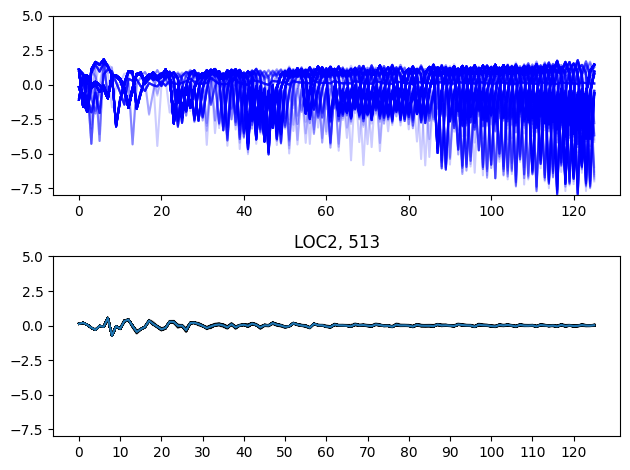

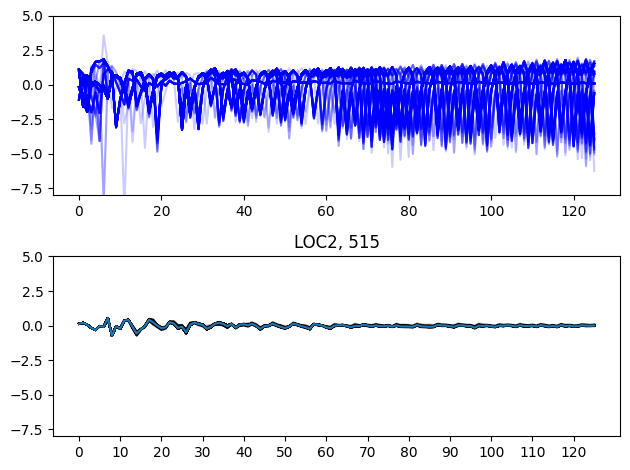

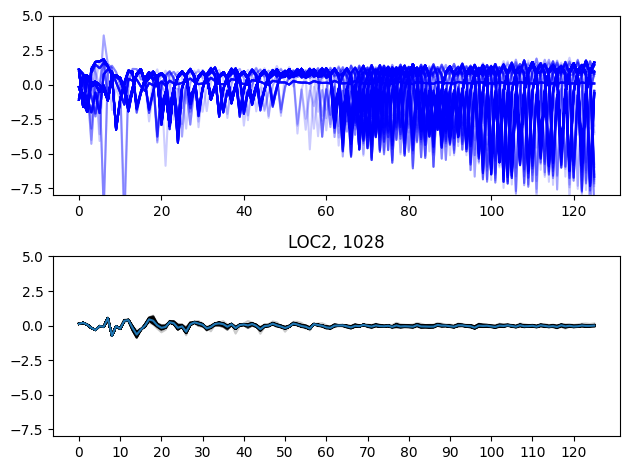

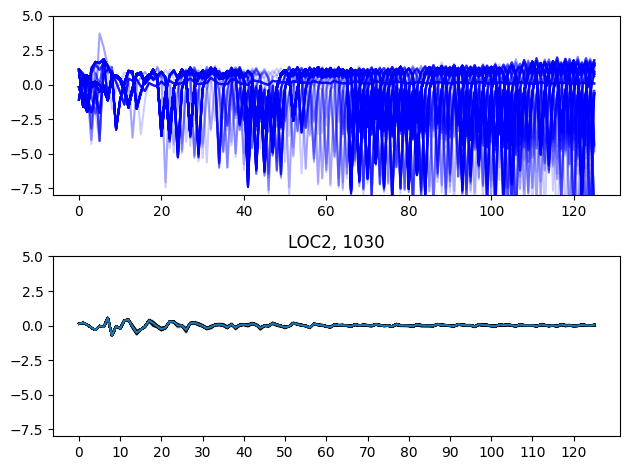

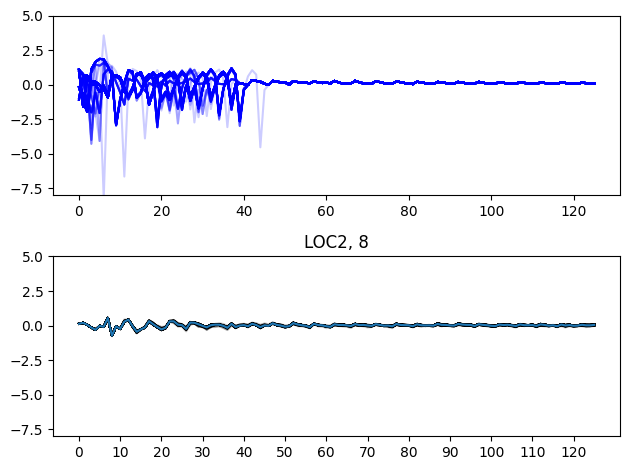

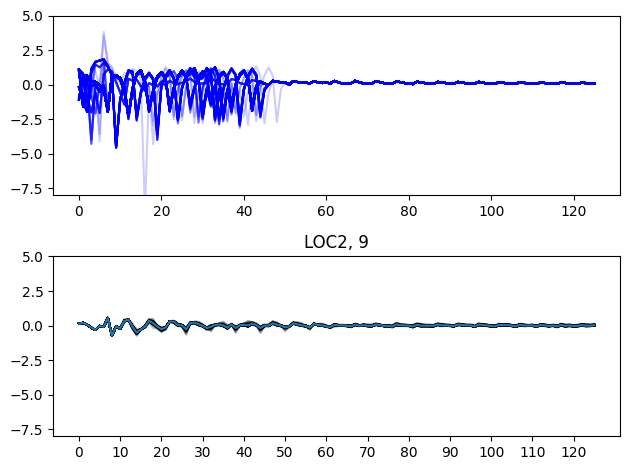

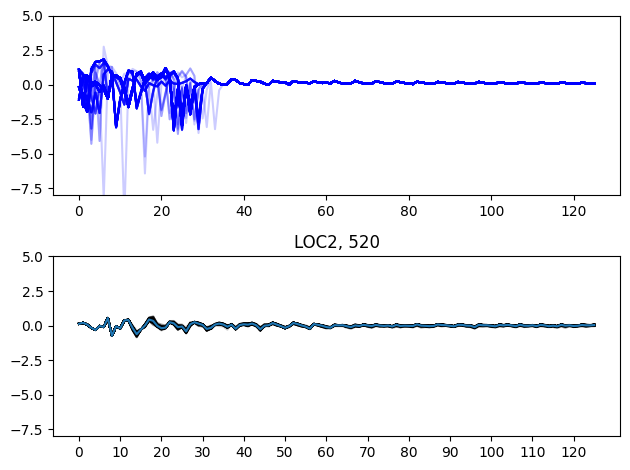

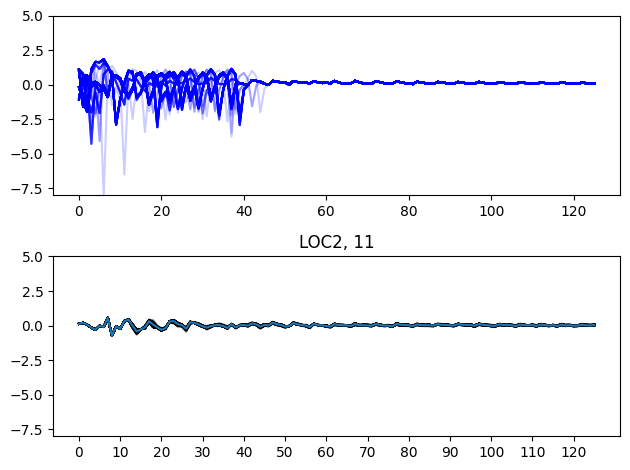

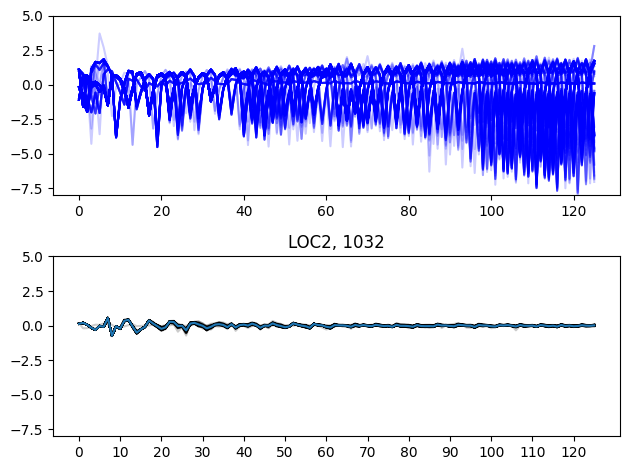

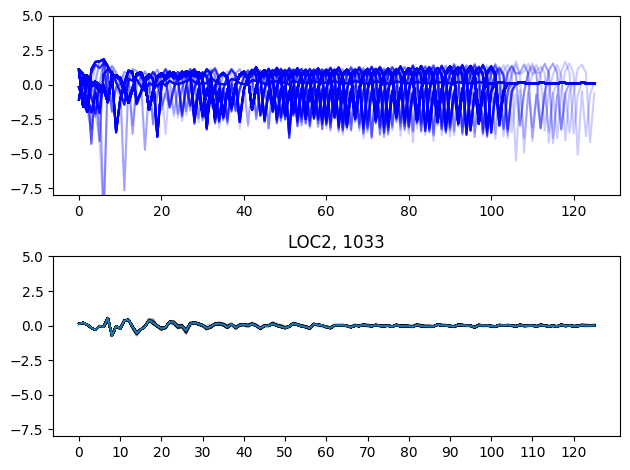

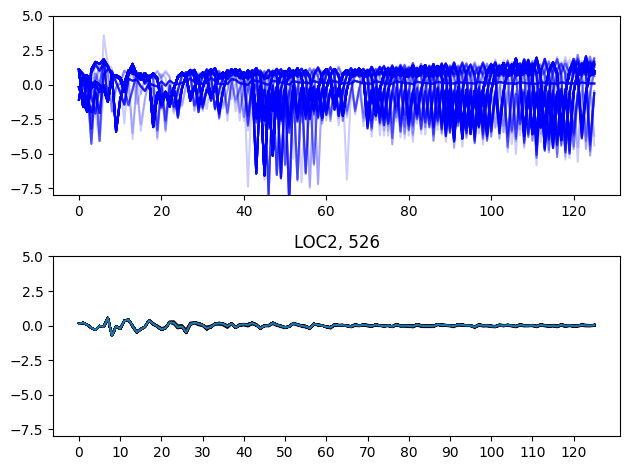

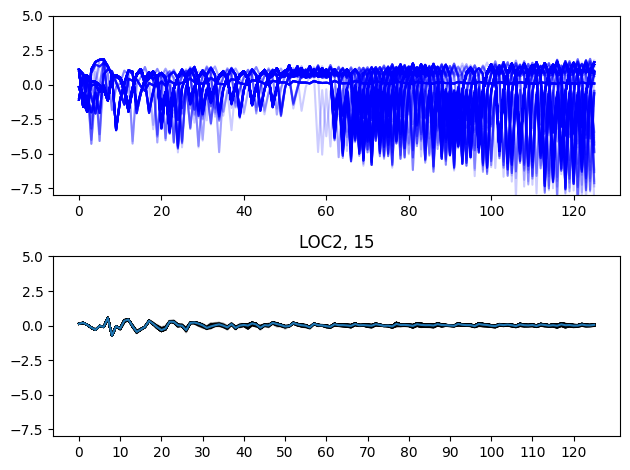

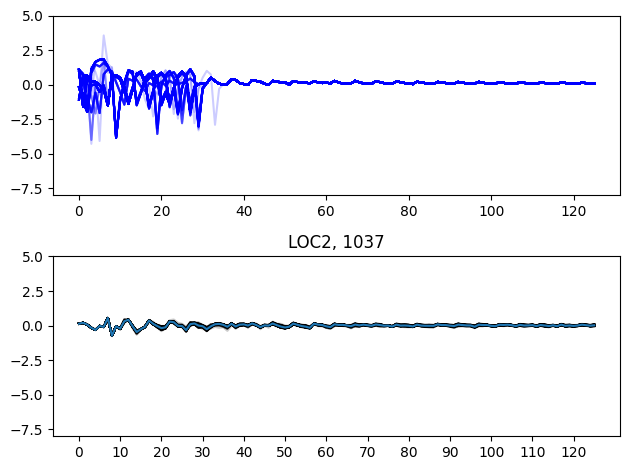

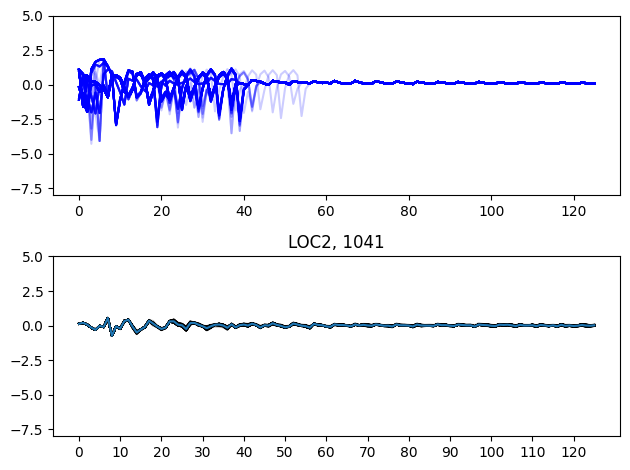

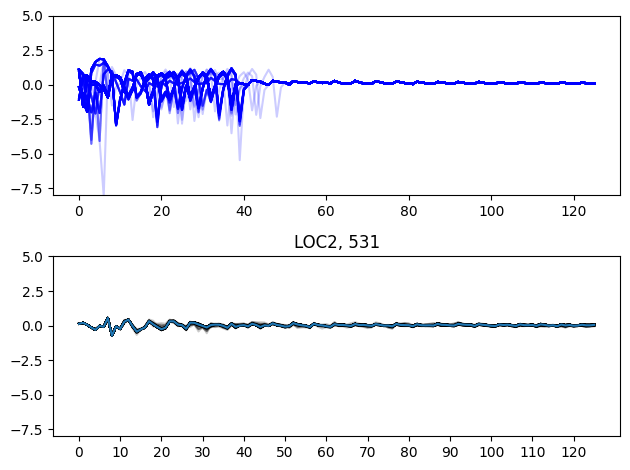

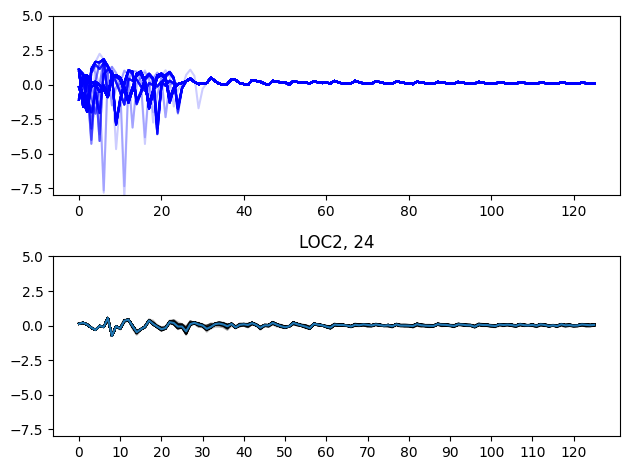

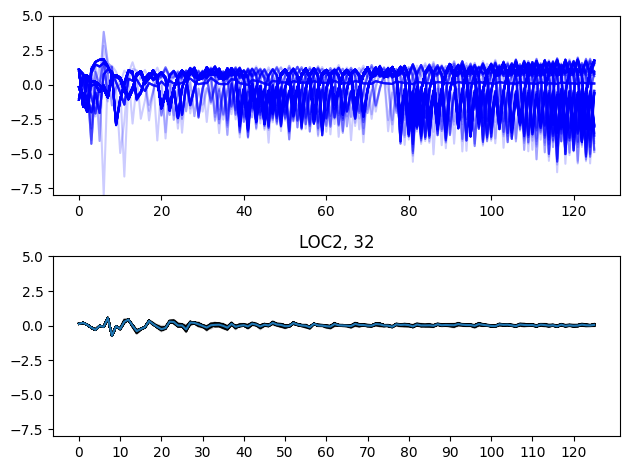

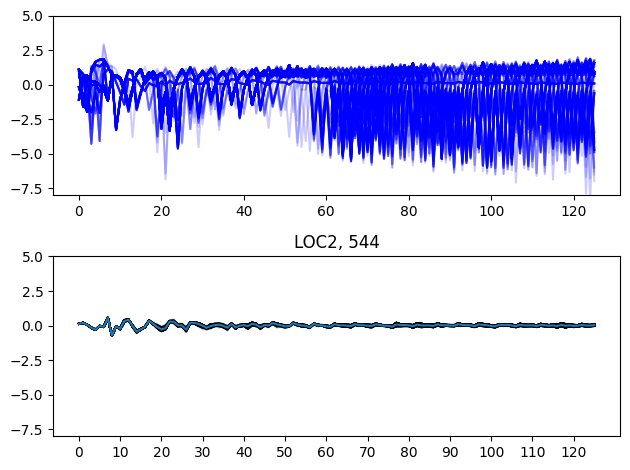

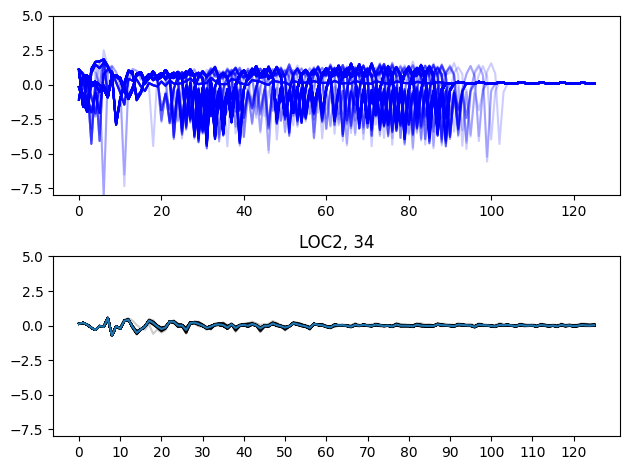

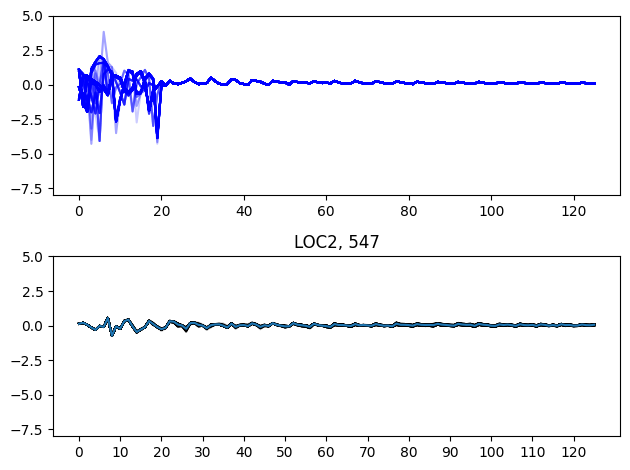

In [28]:
evaluate_decoder('LOC1', 'LOC2')

# Save Synthesis as CSV

In [15]:
synthesis_data = synthesize_traffic('LOC2', 'LOC1')
synthesis_df = pd.DataFrame(synthesis_data, columns=[i for i in range(0, length)])
meta_df = test_df[test_df['Location'] == 'LOC1'].sort_values(by=['Website']).reset_index(drop=True).iloc[:, :2]
synthesis_df = pd.concat([meta_df, synthesis_df], axis=1)

synthesis_df.head(10)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


,Location,Website,0,1,2,3,4,5,6,7,...,116,117,118,119,120,121,122,123,124,125
0,LOC1,8,0.144372,0.070045,-0.007420,-0.227206,-0.217444,-0.111718,0.031630,0.454725,...,-0.224873,-0.150806,-0.395391,-0.449072,-0.594515,-0.783706,-0.464451,-0.777517,-0.846080,-0.517894
1,LOC1,8,0.144169,0.004393,-0.005663,-0.171363,-0.156647,-0.039686,0.025475,0.497445,...,0.356109,0.451305,0.408329,0.374057,0.398120,0.422198,0.565708,0.444317,0.260025,0.228743
2,LOC1,8,0.190784,0.174954,0.043193,-0.212966,-0.371477,-0.080264,-0.044476,0.621017,...,-0.159037,-0.158625,-0.040885,0.073714,-0.135409,-0.132279,-0.194644,-0.050804,-0.091850,-0.075276
3,LOC1,8,0.145468,-0.022978,-0.133901,-0.140725,-0.124062,0.022505,0.109032,0.406064,...,-0.320805,-0.604510,-0.223063,-0.002039,-0.157038,0.012565,-0.405516,-0.129507,-0.116273,0.110144
4,LOC1,8,0.175950,-0.015792,-0.129120,-0.182345,-0.141651,0.033607,0.090591,0.377736,...,-0.225233,-0.504975,-0.301307,-0.056633,-0.225955,-0.079624,-0.440233,-0.226743,-0.267957,0.037128
5,LOC1,8,0.125493,0.017417,-0.096834,-0.145783,-0.156205,-0.001727,0.085235,0.477477,...,-0.114545,-0.371529,-0.216128,-0.134238,-0.222200,-0.071306,-0.422206,-0.230585,-0.274867,-0.068342
6,LOC1,8,0.207692,0.084141,-0.039907,-0.266236,-0.188912,-0.038801,0.011098,0.329190,...,-0.876408,-1.143877,-0.628458,-0.530392,-0.515948,-1.034604,-0.974797,-1.124148,-1.107177,-0.155905
7,LOC1,8,0.130558,0.086970,-0.031676,-0.210561,-0.236330,-0.048597,0.039923,0.488267,...,-0.043922,-0.251062,-0.286753,-0.305276,-0.325319,-0.334323,-0.626486,-0.528287,-0.604051,-0.349117
8,LOC1,8,0.183786,0.040560,-0.092187,-0.152106,-0.194345,0.028928,0.047894,0.503918,...,-0.290536,-0.694230,-0.238866,-0.125624,-0.259358,-0.017956,-0.507138,-0.207874,-0.217929,0.154019
9,LOC1,8,0.133227,-0.050678,-0.093573,-0.203395,-0.075200,-0.001910,0.075049,0.258455,...,-0.600066,-0.701589,-0.251747,0.286960,0.093213,0.023651,-0.384100,0.083014,0.131837,0.240554


In [16]:
synthesis_df.to_csv(f'../synthesized/sampling-LOC2-target-LOC1.csv')